In [330]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import warnings
warnings.filterwarnings("ignore")


# Load the data

When downloading our data, it did not come with headers. We fixed this by adding getting the ordered headers from directory we downloaded the data frame, and implemented then BY USING... From this group of files, we confirmed our theories that variable_name_SE was the standard error and variable_name_Worst was the largest value. Along with the leading diagonal of our pair plots of all the unique variables following a normal distributions, inline with the Central Limit Theorem, gave us confidence we have assigned the correct headers onto our dataframe.

Originally our data was in .name and .data file formats, which we could not access. We fixed this by converting the files into a .csv format. This gave us an error that we might lose information, however according to the data set summary we still have every instance of our data and every column, and it is to the same 4 significant figures-so we know no data has been lost.


In [314]:
df = pd.read_csv("./wdbc.csv")
df.head(10)

,ID,B/M,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Clean the data?

Our data is supposedly clean, and observing the first few instances it does seem so. We already know that Pandas only allows one data type per column, so this is a non issue. We will look for duplicates in our data, as the probability of so many factors being identical is significantly low- if we have duplicates this may be a fault in the data collection or the previously mentioned .csv method of extracting the data. One issue that we cannot determine just from looking at the data, is the data type of our values, i.e a string for a float.

In [315]:
print(f"Same patient entered more than once: {df.duplicated().any()}")
df_dup = df.drop('ID', axis=1)
print(f"Same patient entered more than once under a different ID: {df_dup.duplicated().any()}") # testing with ID
print(f"Null values? {df.isnull().values.any()}")
print(f"There are {len(df)} instances, of which {df['ID'].nunique()} are unique \n")
df.info()

## SHOULD I WRITE COMMENTS WITHIN THE PYTHON CODE OR THE MARKDOWN?


Same patient entered more than once: False
Same patient entered more than once under a different ID: False
Null values? False
There are 569 instances, of which 569 are unique 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     569 non-null    int64  
 1   B/M                    569 non-null    object 
 2   Radius                 569 non-null    float64
 3   Texture                569 non-null    float64
 4   Perimeter              569 non-null    float64
 5   Area                   569 non-null    float64
 6   Smoothness             569 non-null    float64
 7   Compactness            569 non-null    float64
 8   Concavity              569 non-null    float64
 9   ConcavePoints          569 non-null    float64
 10  Symmetry               569 non-null    float64
 11  FractalDimension       569 non-null  

We will next split our data in its label and features, and drop our ID column- as it bears no effect on our model (and as each instance value overall is unique, we could always reverse engineer our way back to get the ID).

In [316]:
label = df["B/M"]
not_data = ["ID", "B/M"]
feature = df.drop(not_data, axis=1)
data = pd.concat([label, feature], axis=1)

### Data Visualization & Exploration

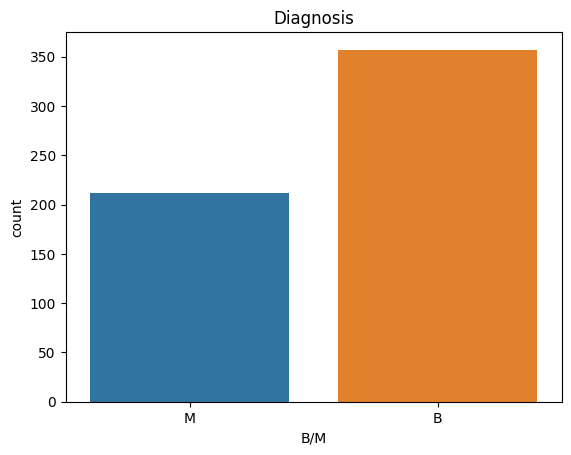

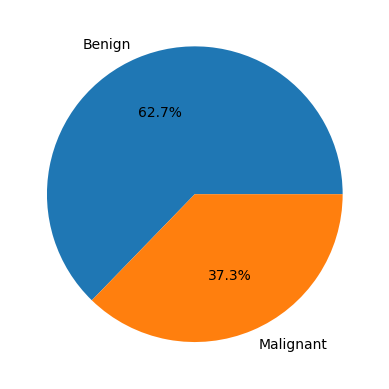

Benign: 357
Malignant: 212


,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [317]:
sns.countplot(data=feature, x=label) # don't need both graphs?
plt.title("Diagnosis")
plt.show()
plt.pie(x=label.value_counts(), labels=["Benign", "Malignant"], autopct='%1.1f%%')
plt.show()
B, M = label.value_counts()
print("Benign:", B)
print("Malignant:", M)
feature.describe()


The ratio of Benign is slightly higher than what we would expect (as ~80% of breast cancer on average is Benign), and our data is only slightly imbalanced. However, we may still decide to try penalized models as the percentage of Malignant tumours is higher than normal (so we would penalize malignant) and because the cost of false negatives is very high (as treatment will be delayed) so we may want to significantly penalize false negatives in our model.

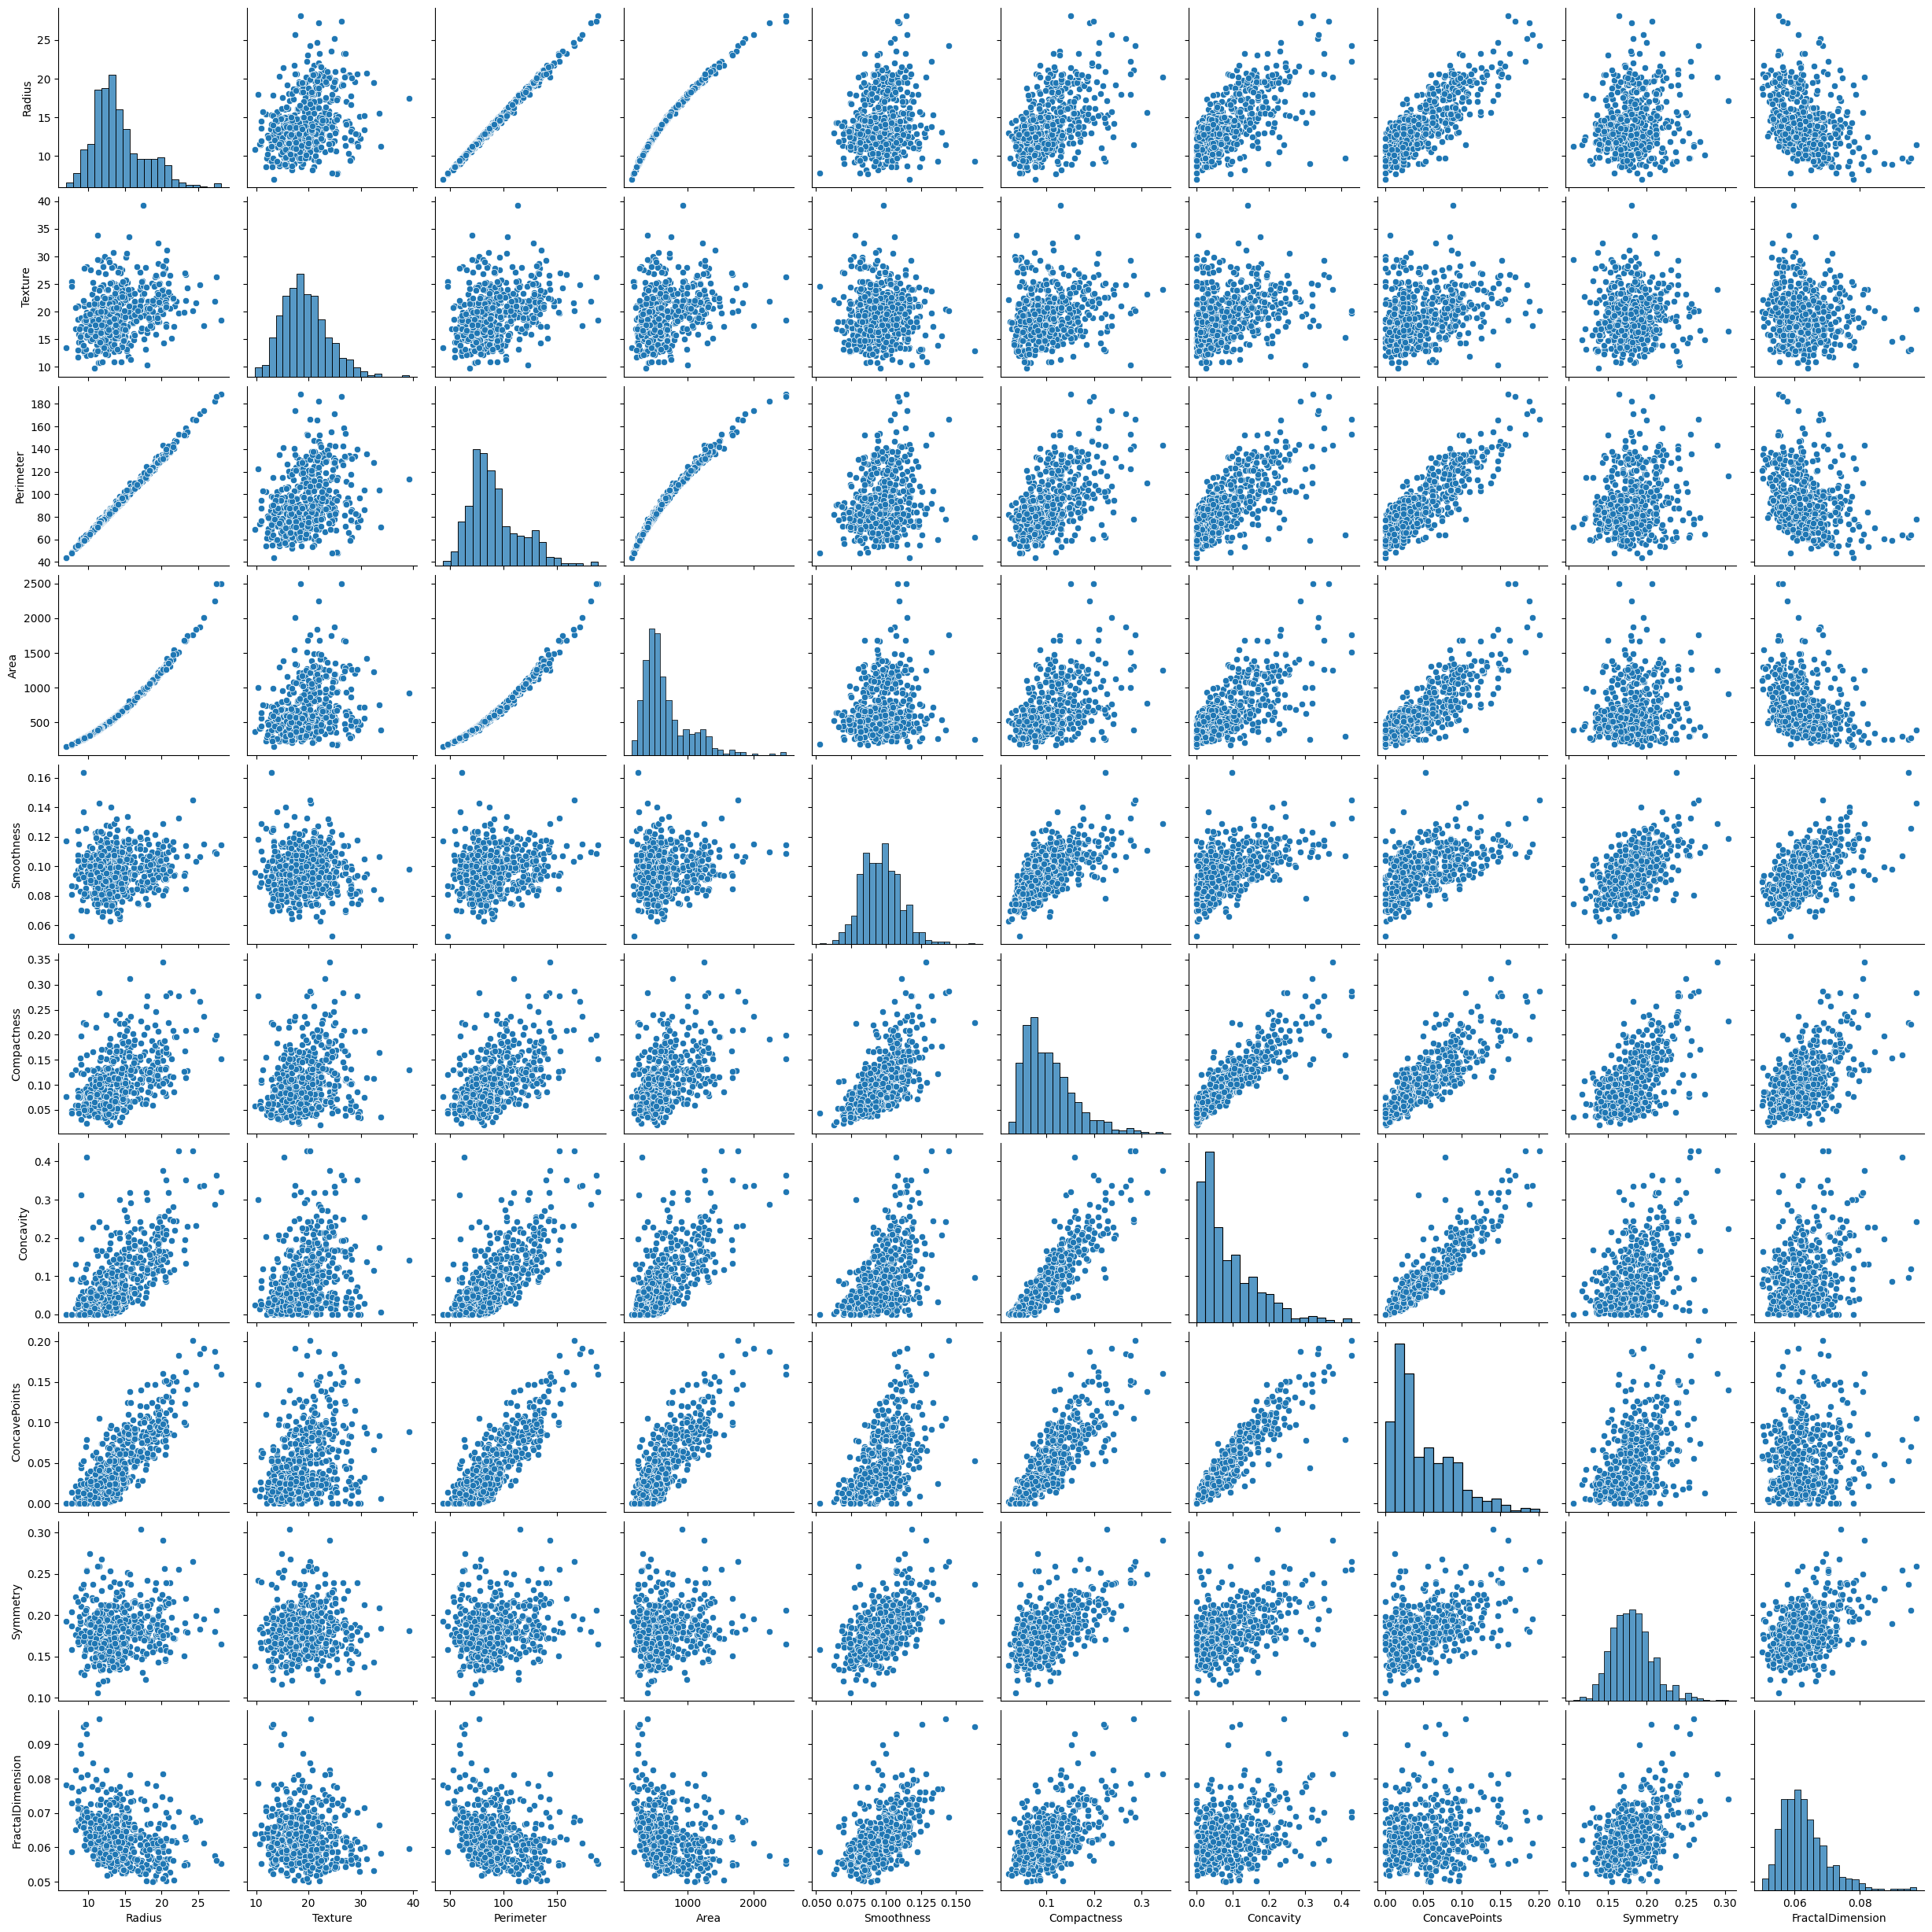

In [318]:
sns.pairplot(data=feature.iloc[::, :10])
plt.show()
## CANT GET HUE TO WORK FOR B AND M, THIS WOULD HELP A LOT IN EXPLORING DATA
# commented out as this pairplot takes a while to run

fWe can talk about the normality with CLT of leading diagonal (for each variable roughly normal, maybe concave stuff is exponential). Also talk about mathematical link of radius, perimeter and area or concavity and concave points (what even is that)???

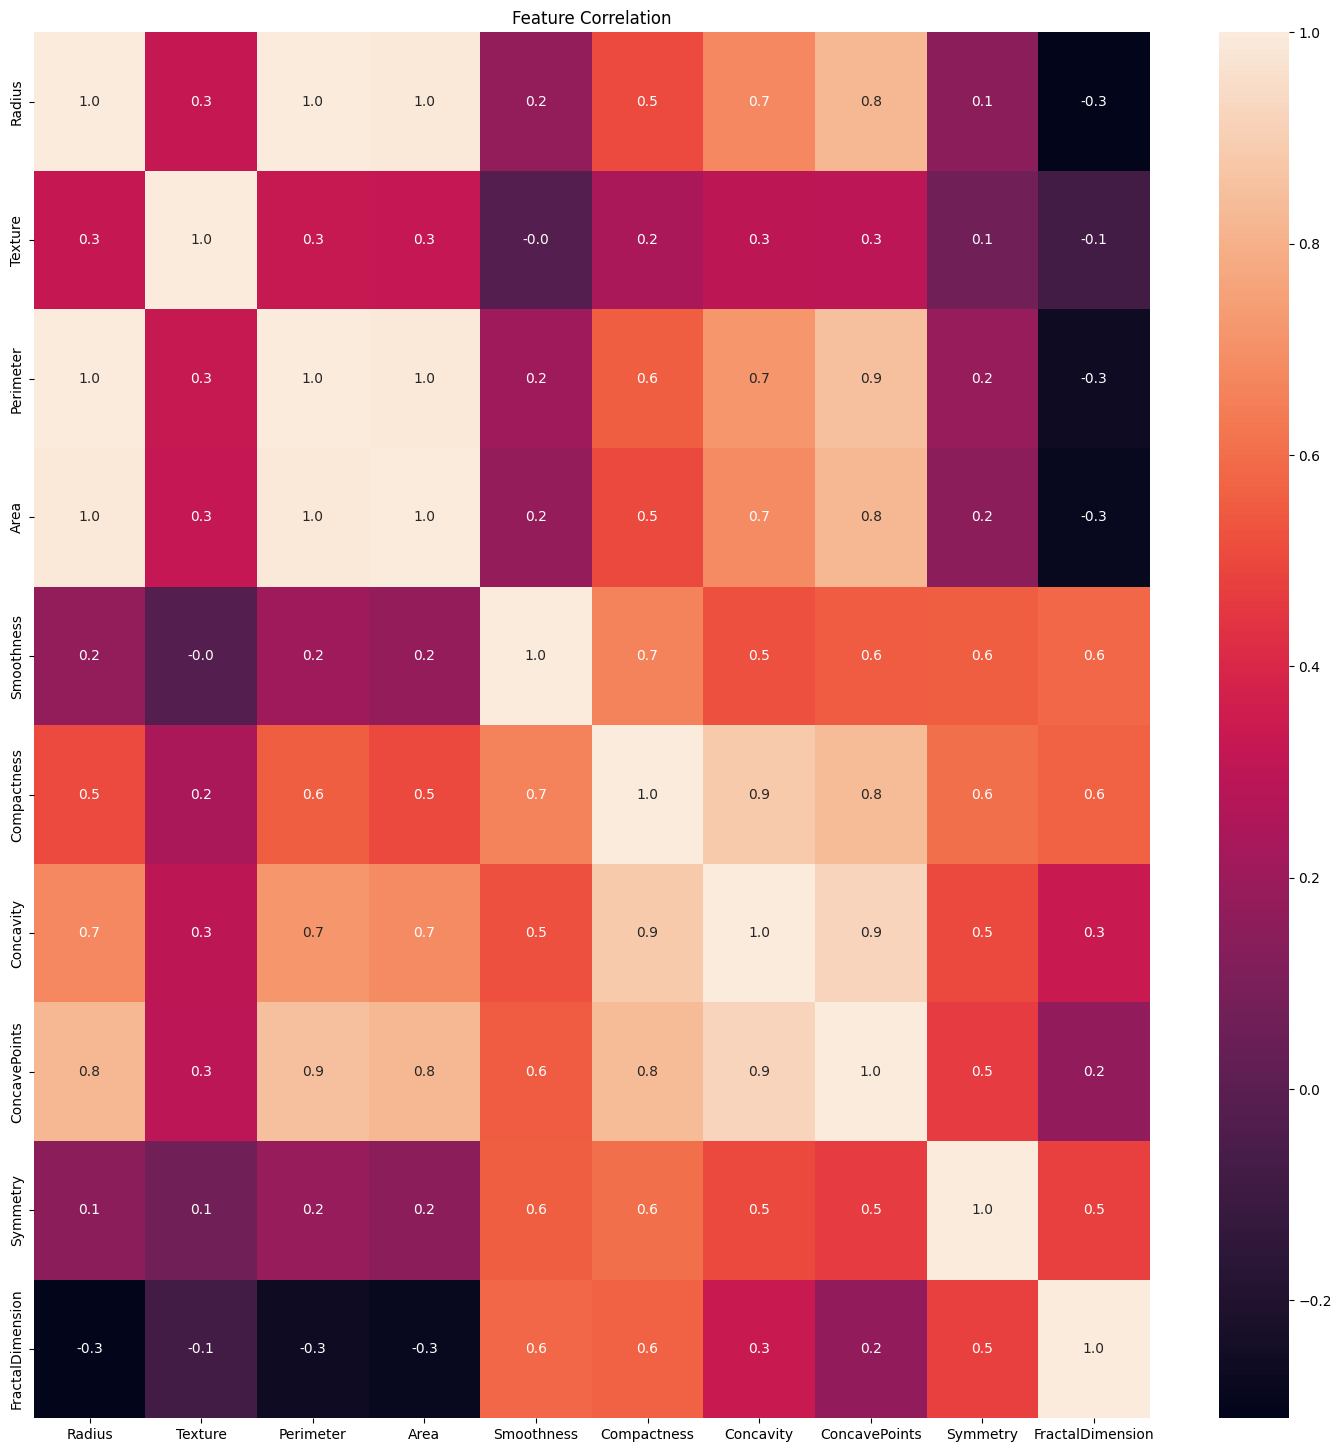

In [319]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap((feature.iloc[::, :10]).corr(), annot=True, fmt=".1f", ax=ax)
plt.title("Feature Correlation")
plt.show()

As we can see from this table, there is a variety of variables that have different correlations. Most apparently is the link between Area, Perimeter and Radius - not plotted but also true, is the relation of these with PerimeterWorst, AreaWorst and RadiusWorst. Interestingly, FractalDimension is the only variable that has a negative correlation to the other variables-especially to do with the previously mentioned variables.

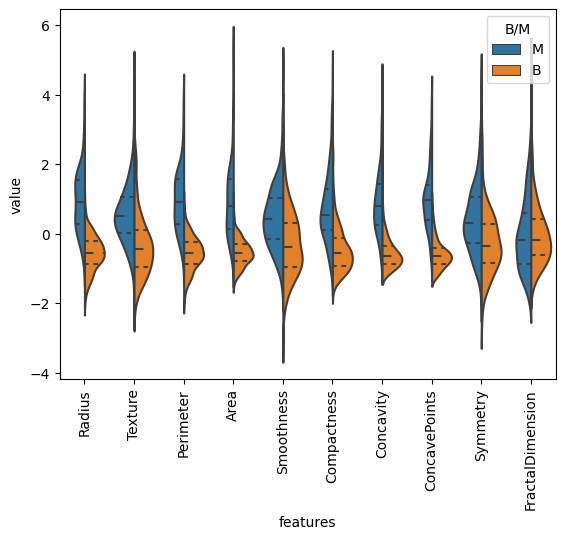

In [320]:
temp_y, temp_x = label, feature
normal_data = (temp_x - temp_x.mean()) / (temp_x.std())  # is this not standardisation? we do this later properly, kinda redudant?
data = pd.concat([label, normal_data.iloc[::, :10]], axis=1)
# index 0:10, 10:20, 20: # for usual, se, worst -> can repeat 3 times if we want
data = pd.melt(data, id_vars="B/M", var_name="features", value_name='value')
sns.violinplot(x="features", y="value", hue="B/M", data=data, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [321]:
## WHAT INFERENCES CAN WE MAKE FROM THIS??


# Data Preprocessing

We want our data in the correct format, and as we so when looking at datatypes initially, the only data type we need to change is our label column from object to int because ????. We do this by encoding our data in 1 and 0.

In [322]:
encoder = LabelEncoder().fit(df["B/M"])
df['B/M'] = encoder.transform(df["B/M"])
label = df["B/M"]
not_data = ["ID", "B/M"]
feature = df.drop(not_data, axis=1)
data = pd.concat([label, feature], axis=1)
# this is a repeat of previous code with LabelEncoder() added

We  standardize our data, as looking at the data summaries and graphs we that a variety of scales for the axis are used. This ensures that variables don't get given a bigger 'weight' in our models simply because they operate on a larger scale. StandardScalar gives the data a mean of 0, and a variance of 1 - this gives the data a standard normal distribution shape and hence performs better in ?regression? type algorithms.

In [323]:
col_names = list(feature.columns)
feature_scaled = StandardScaler().fit_transform(feature) # sklearn removes col names in preprocessing
feature_scaled = pd.DataFrame(feature_scaled, columns = col_names) #Doesn't change pairplot
print(feature_scaled)



       Radius   Texture  Perimeter      Area  Smoothness  Compactness  \
0    1.097064 -2.073335   1.269934  0.984375    1.568466     3.283515   
1    1.829821 -0.353632   1.685955  1.908708   -0.826962    -0.487072   
2    1.579888  0.456187   1.566503  1.558884    0.942210     1.052926   
3   -0.768909  0.253732  -0.592687 -0.764464    3.283553     3.402909   
4    1.750297 -1.151816   1.776573  1.826229    0.280372     0.539340   
..        ...       ...        ...       ...         ...          ...   
564  2.110995  0.721473   2.060786  2.343856    1.041842     0.219060   
565  1.704854  2.085134   1.615931  1.723842    0.102458    -0.017833   
566  0.702284  2.045574   0.672676  0.577953   -0.840484    -0.038680   
567  1.838341  2.336457   1.982524  1.735218    1.525767     3.272144   
568 -1.808401  1.221792  -1.814389 -1.347789   -3.112085    -1.150752   

     Concavity  ConcavePoints  Symmetry  FractalDimension  ...  RadiusWorst  \
0     2.652874       2.532475  2.217515     

We have a lot of features in our dataset, this takes up more computational power, storage and can lead to overfitting our models. To combat this we will implement dimension reduction. We will use Principal Component Analysis (PCA), however one negative of this is that our newly created variables don't give use information we can use as an inference.

In [324]:
pca = PCA(n_components=0.85, whiten=True)

feature_pca = pca.fit_transform(feature_scaled)
print(feature_pca)

print("Original number of features:", feature.shape[1])
print("Reduced number of features:", feature_pca.shape[1])
feature_pca = pd.DataFrame(feature_pca, columns = ["1", "2", "3", "4", "5", "6"])
print(feature_pca.head())
#????? ONLY 6 FEATURES?, AND IDK IF THEY'RE ACTUAL FEATURES OR TRANSFORMATIONS

[[ 2.5202421   0.81607324 -0.66849088  2.57969268 -0.92993184  1.28338775]
 [ 0.65462259 -1.57812318 -0.3150267   0.79388848  0.48381178  0.02605681]
 [ 1.57196381 -0.45028645 -0.32839151  0.64751437 -0.13779301  0.49233457]
 ...
 [ 0.34438509 -0.79668835  0.33492838 -1.48320385  1.40837947 -0.48596506]
 [ 2.844279    0.70024354 -1.1171784  -1.67261595 -0.02625507  0.51641639]
 [-1.50105337 -0.28086498  0.88708833 -1.63223943 -0.14372022  1.47107601]]
Original number of features: 30
Reduced number of features: 6
          1         2         3         4         5         6
0  2.520242  0.816073 -0.668491  2.579693 -0.929932  1.283388
1  0.654623 -1.578123 -0.315027  0.793888  0.483812  0.026057
2  1.571964 -0.450286 -0.328392  0.647514 -0.137793  0.492335
3  1.952778  4.303452 -1.924106  0.108298 -2.303901  2.776432
4  1.078874 -0.815859  0.827167  2.087647  0.425432 -1.115234


An alternative to PCA, is feature selection which enables us to keep our original feature information - so that we can make inferences from it, which would be far more helpful. We will later compare the accuracy of these different datasets as well. Also, we will try to find the generale variables that are most valuable for us instead of finding specific ones for each model- as this way, we can determine which tests/sign the doctors should observe for. One thing to consider is domain knowledge is superior to this feature selection methods.

In [325]:
selector = SelectKBest(mutual_info_classif, k =15)
selector.fit(feature_scaled, label)
feature.columns[selector.get_support()]
# There are different models we can use, very interesting tho i didn't expect this
# Although this is not the same as dimension reduction, as it just keeps what ever is important - but as you can see radius perimter and area are still here? Do I remove manually?? Perimeter Radius exactly linear on og pairplot, but perimeter area exponential

Index(['Radius', 'Perimeter', 'Area', 'Compactness', 'Concavity',
       'ConcavePoints', 'RadiusSE', 'PerimeterSE', 'AreaSE', 'RadiusWorst',
       'PerimeterWorst', 'AreaWorst', 'CompactnessWorst', 'ConcavityWorst',
       'ConcavePointsWorst'],
      dtype='object')

Now our data is ready to be used, so we next split our data into the train/test/validation sets. These ratios be tuned at a later date depending on the number of features in our data and the specific algorithm(???????). We used a stratified sample, as this is a classification problem with our labels being either Benign(0) or Malignant(1) and we do not want to risk a significant imbalance in either set, especially because although our data is large there is still a chance of this happening. We do not have to shuffle our dataframe manually, as train_test_split(shuffle=True).

In [326]:
x, x_test, y, y_test = train_test_split(feature, label, test_size=0.25, stratify=label)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, stratify=y)

<AxesSubplot: xlabel='FractalDimension', ylabel='Count'>

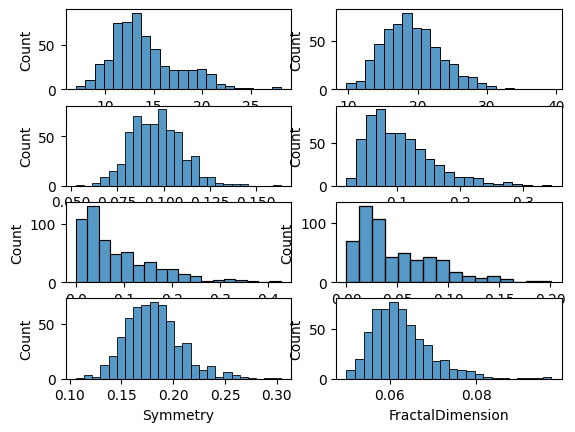

In [327]:
fig, ax = plt.subplots(4, 2)
sns.histplot(feature['Radius'], ax=ax[0, 0])
sns.histplot(feature['Texture'], ax=ax[0, 1])
sns.histplot(feature['Smoothness'], ax=ax[1, 0])
sns.histplot(feature['Compactness'], ax=ax[1, 1])
sns.histplot(feature['Concavity'], ax=ax[2, 0])
sns.histplot(feature['ConcavePoints'], ax=ax[2, 1])
sns.histplot(feature['Symmetry'], ax=ax[3, 0])
sns.histplot(feature['FractalDimension'], ax=ax[3, 1])

<AxesSubplot: xlabel='FractalDimension', ylabel='Count'>

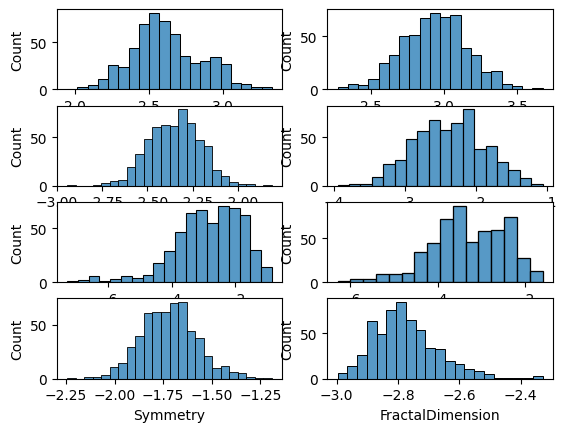

In [331]:
fig, ax = plt.subplots(4, 2)
sns.histplot(np.log(df['Radius']), ax=ax[0, 0])
sns.histplot(np.log(df['Texture']), ax=ax[0, 1])
sns.histplot(np.log(df['Smoothness']), ax=ax[1, 0])
sns.histplot(np.log(df['Compactness']), ax=ax[1, 1])
sns.histplot(np.log(df['Concavity']), ax=ax[2, 0])
sns.histplot(np.log(df['ConcavePoints']), ax=ax[2, 1])
sns.histplot(np.log(df['Symmetry']), ax=ax[3, 0])
sns.histplot(np.log(df['FractalDimension']), ax=ax[3, 1])